## Analyzing Best-Seller Trends

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

# Load the dataset (Replace 'your_file.csv' with the actual file path)
df = pd.read_csv(r"D:\Lab\Week_13\AmazonUK_dataset.csv")

# Display basic info
print(tabulate(df.head(), headers='keys', tablefmt='psql'))
print(tabulate(df.info(), headers='keys', tablefmt='psql'))

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Display column names
print(tabulate([[col] for col in df.columns], headers=['Columns'], tablefmt='psql'))


+----+-------+------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------+---------+----------------+---------------------+----------------+
|    |   uid | asin       | title                                                                                                                                                                                              |   stars |   reviews |   price | isBestSeller   |   boughtInLastMonth | category       |
|----+-------+------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+-----------+---------+----------------+---------------------+----------------|
|  0 |     1 | B09B96TG33 | Echo Dot (5th generation, 2022 re

Crosstab Columns: Index([False, True], dtype='bool', name='isBestSeller')


isBestSeller,False,True
category,,
Grocery,0.941865,0.058135
Smart Home Security & Lighting,0.942308,0.057692
Health & Personal Care,0.942314,0.057686
Mobile Phone Accessories,0.957529,0.042471
Power & Hand Tools,0.964661,0.035339
...,...,...
Bedding Collections,1.000000,0.000000
CPUs,1.000000,0.000000
"CD, Disc & Tape Players",1.000000,0.000000


Chi-square test p-value: 0.0
Cramér's V: 0.1222829439760564


<Figure size 1200x600 with 0 Axes>

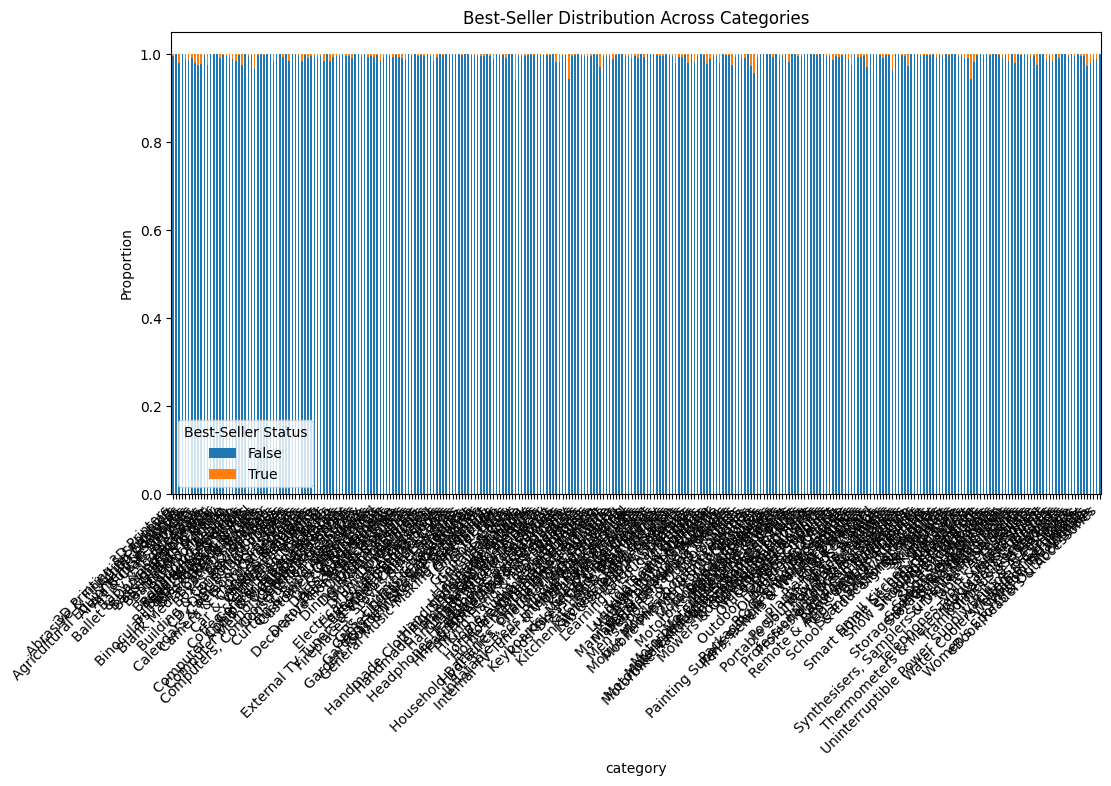

In [3]:
# Part 1: Analyzing Best-Seller Trends

# Create a crosstab of category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Check column names to avoid KeyError
print("Crosstab Columns:", crosstab.columns)

# Sort using the correct column name instead of '1'
crosstab_sorted = crosstab.sort_values(by=crosstab.columns[-1], ascending=False)
display(crosstab_sorted)

# Chi-square test
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))
print(f"Chi-square test p-value: {p}")

# Cramér's V
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

# Visualization (Stacked Bar Chart)
plt.figure(figsize=(12, 6))
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Best-Seller Distribution Across Categories')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.legend(title="Best-Seller Status")
plt.show()


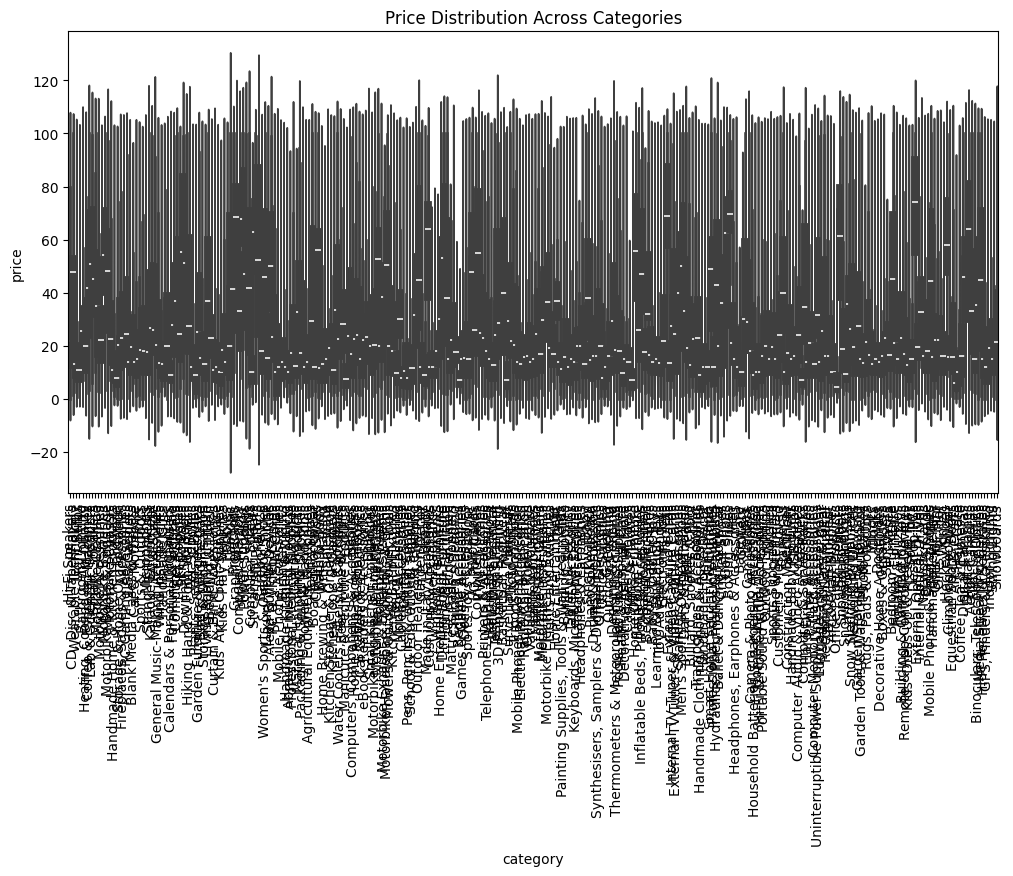

Correlation between price and rating: -0.07767299878181261


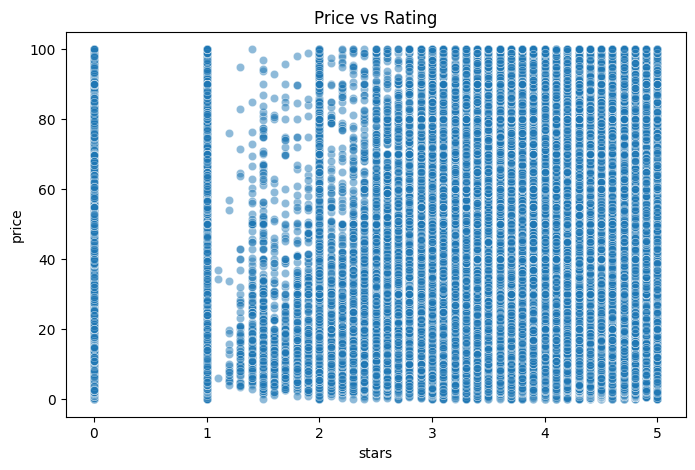

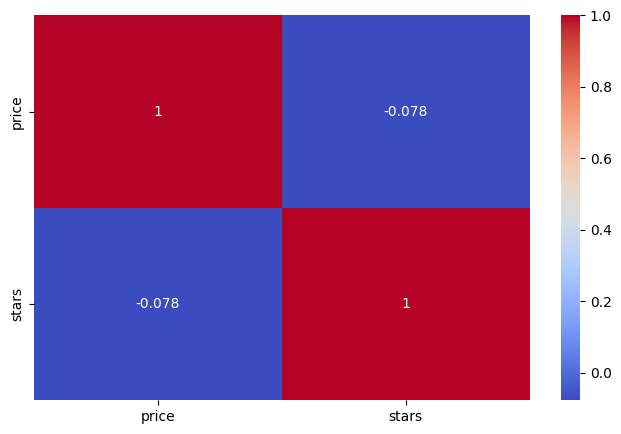

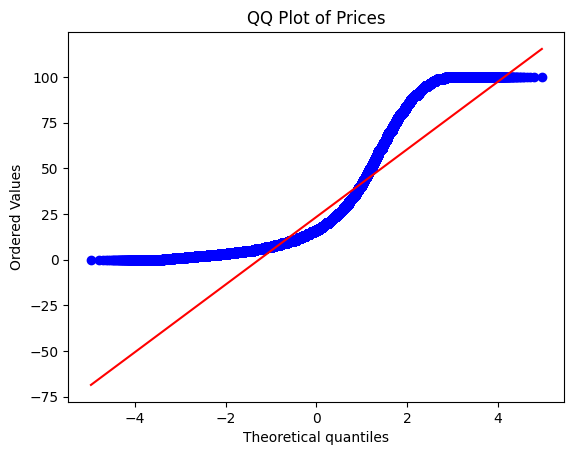

In [4]:


# Part 2: Exploring Product Prices
# Remove outliers
df_cleaned = remove_outliers_iqr(df, 'price')

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Categories')
plt.show()

# Part 3: Correlation Between Price & Ratings
correlation = df_cleaned[['price', 'stars']].corr()
print(f"Correlation between price and rating: {correlation.iloc[0,1]}")

# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='stars', y='price', data=df_cleaned, alpha=0.5)
plt.title('Price vs Rating')
plt.show()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_cleaned[['price', 'stars']].corr(), annot=True, cmap='coolwarm')
plt.show()

# QQ Plot for Normality Check
stats.probplot(df_cleaned['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Prices')
plt.show()
